In [1]:
def shift(qkv, bsz, q_len, group_size, num_heads, head_dim):
    qkv[:, num_heads // 2:] = qkv[:, num_heads // 2:].roll(-group_size // 2, dims=2)
    qkv = qkv.transpose(1, 2).reshape(bsz * (q_len // group_size), group_size, num_heads, head_dim).transpose(1, 2)
    return qkv

In [12]:
nums = [3,5,1,1,1,2,2,3]

In [15]:
a = nums.sort()

In [ ]:
from collections import defaultdict

In [18]:
letterMap = [
            "",     # 0
            "",     # 1
            "abc",  # 2
            "def",  # 3
            "ghi",  # 4
            "jkl",  # 5
            "mno",  # 6
            "pqrs", # 7
            "tuv",  # 8
            "wxyz"  # 9
        ]

In [ ]:
letterMap

In [5]:

dic = {}

for i in range(len(nums)):
    dic[nums[i]] = dic.get(nums[i],0) + 1

In [8]:
nums[i]

3

In [10]:
dic.get(nums[i])

1

In [6]:
dic

{1: 3, 2: 2, 3: 1}

In [3]:
from collections import deque

In [3]:
int(eval(f'1+2'))

3

In [ ]:
class MyQueue:
    def __init__(self):
        self.que_in = deque()
        self.que_out = deque()

    def push(self, x: int) -> None:
        self.que_in.append(x)
    
    def pop(self) -> int:
        if self.empty():
            return None
        for i in range(len(self.que_in)-1):
            self.que_out.append(self.que_in.popleft())
        self.que_in, self.que_out = self.que_out, self.que_in
        return self.que_out.popleft()


    def top(self) -> int:
        if self.empty():
            return None
        ans = self.que_in[-1]
        return ans


    def empty(self) -> bool:
        return not(self.que_in or self.que_out)


        

In [9]:
import torch
import torch.nn as nn

# 定义模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 一个简单的线性层

    def forward(self, x):
        return self.linear(x)

# 实例化模型和损失函数
model = SimpleModel()
criterion = nn.MarginRankingLoss(margin=1.0)  # 设置边界值为1.0

# 假设我们有两个输入x1和x2，以及它们的正确排序关系y
x1 = torch.tensor([[1.0]])
x2 = torch.tensor([[2.0]])
y = torch.tensor([[-1.0]])  # 我们期望x2大于x1

# 计算模型的输出
output1 = model(x1)
output2 = model(x2)

# 计算损失
loss = criterion(output1, output2, y)

# 打印损失值
print(loss.item())

# 反向传播和优化
loss.backward()
# 假设我们有一个优化器
# optimizer.step()
# optimizer.zero_grad()

1.2007248401641846


In [15]:
output1

tensor([[-0.1863]], grad_fn=<AddmmBackward0>)

In [14]:
output2

tensor([[-0.3870]], grad_fn=<AddmmBackward0>)

In [20]:
criterion(output1, output2,  y)

tensor(1.2007, grad_fn=<MeanBackward0>)

In [3]:
2**7

128

In [5]:

llamaconfig = LlamaConfig(vocab_size=32000,
                            hidden_size=4096//2,
                            intermediate_size=11008//2,
                            num_hidden_layers=32//2,
                            num_attention_heads=32//2,
                            max_position_embeddings=2048//2)

In [6]:
import torch
from transformers.models.llama import  LlamaModel,LlamaConfig, tokenization_llama
inputs_ids = torch.randint(
    low=0, high=llamaconfig.vocab_size, size=(4,30)
)

In [10]:
inputs_ids[0]

tensor([25335, 31512,  5938,  1857, 21167, 17652, 25922,  6420, 16560,  6122,
        23392, 31341, 30285,   962, 14008, 11489, 19566, 13336,  5855, 19045,
        26468, 15024, 27491,  5106, 21616, 23265,  1594, 26583, 13288, 16050])

In [73]:
import torch

bsz = 2
num_heads = 4
q_len =6
head_dim = 3
group_size = 2

qkv = torch.arange(bsz * num_heads * q_len * head_dim).reshape(bsz, num_heads, q_len, head_dim)

In [67]:
qkv.shape

torch.Size([2, 4, 6, 3])

In [74]:
qkv[:, num_heads // 2:] = qkv[:, num_heads // 2:].roll(-4 // 2, dims=2)

In [75]:
qkv

tensor([[[[  0,   1,   2],
          [  3,   4,   5],
          [  6,   7,   8],
          [  9,  10,  11],
          [ 12,  13,  14],
          [ 15,  16,  17]],

         [[ 18,  19,  20],
          [ 21,  22,  23],
          [ 24,  25,  26],
          [ 27,  28,  29],
          [ 30,  31,  32],
          [ 33,  34,  35]],

         [[ 42,  43,  44],
          [ 45,  46,  47],
          [ 48,  49,  50],
          [ 51,  52,  53],
          [ 36,  37,  38],
          [ 39,  40,  41]],

         [[ 60,  61,  62],
          [ 63,  64,  65],
          [ 66,  67,  68],
          [ 69,  70,  71],
          [ 54,  55,  56],
          [ 57,  58,  59]]],


        [[[ 72,  73,  74],
          [ 75,  76,  77],
          [ 78,  79,  80],
          [ 81,  82,  83],
          [ 84,  85,  86],
          [ 87,  88,  89]],

         [[ 90,  91,  92],
          [ 93,  94,  95],
          [ 96,  97,  98],
          [ 99, 100, 101],
          [102, 103, 104],
          [105, 106, 107]],

         [[114

In [70]:
qkv.transpose(1, 2).reshape(bsz * (q_len // group_size), group_size, num_heads, head_dim).transpose(1, 2).shape

torch.Size([6, 4, 2, 3])

In [71]:
qkv = qkv.transpose(1, 2).reshape(bsz * (q_len // group_size), group_size, num_heads, head_dim).transpose(1, 2)

In [72]:
qkv

tensor([[[[  0,   1,   2],
          [  3,   4,   5]],

         [[ 18,  19,  20],
          [ 21,  22,  23]],

         [[ 39,  40,  41],
          [ 42,  43,  44]],

         [[ 57,  58,  59],
          [ 60,  61,  62]]],


        [[[  6,   7,   8],
          [  9,  10,  11]],

         [[ 24,  25,  26],
          [ 27,  28,  29]],

         [[ 45,  46,  47],
          [ 48,  49,  50]],

         [[ 63,  64,  65],
          [ 66,  67,  68]]],


        [[[ 12,  13,  14],
          [ 15,  16,  17]],

         [[ 30,  31,  32],
          [ 33,  34,  35]],

         [[ 51,  52,  53],
          [ 36,  37,  38]],

         [[ 69,  70,  71],
          [ 54,  55,  56]]],


        [[[ 72,  73,  74],
          [ 75,  76,  77]],

         [[ 90,  91,  92],
          [ 93,  94,  95]],

         [[111, 112, 113],
          [114, 115, 116]],

         [[129, 130, 131],
          [132, 133, 134]]],


        [[[ 78,  79,  80],
          [ 81,  82,  83]],

         [[ 96,  97,  98],
          [ 9

In [1]:
import torch


In [12]:
torch.arange(0, 5000, dtype=torch.float).unsqueeze(1)

tensor([[0.0000e+00],
        [1.0000e+00],
        [2.0000e+00],
        ...,
        [4.9970e+03],
        [4.9980e+03],
        [4.9990e+03]])

In [17]:
from transformers import LlamaModel

In [16]:
import torch

# 假设 embeddings 的形状是 [2, 3, 4]
embeddings = torch.randn(2, 3, 4)

# 设置 batch_size 和 nums_head
batch_size = 2
nums_head = 5

# 使用 repeat 扩展形状
embeddings = embeddings.repeat((batch_size, nums_head, *([1] * len(embeddings.shape))))

# 输出结果的形状
print("New embeddings shape:", embeddings.shape)


New embeddings shape: torch.Size([2, 5, 2, 3, 4])


In [15]:
def sinusoidal_position_embedding(batch_size, nums_head, max_len, output_dim, device):

max_position_embedding=2048
base=10000
device=None
scaling_factor=1.0   
# (max_len, 1)
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(-1)

# (output_dim//2)
# 即公式里的i, i的范围是 [0,d/2]
ids = torch.arange(0, output_dim // 2, dtype=torch.float)  
theta = torch.pow(10000, -2 * ids / output_dim)

# (max_len, output_dim//2)
# 即公式里的：pos / (10000^(2i/d))
embeddings = position * theta 

# (max_len, output_dim//2, 2)
embeddings = torch.stack([torch.sin(embeddings), torch.cos(embeddings)], dim=-1)

# (bs, head, max_len, output_dim//2, 2)
# 在bs维度重复，其他维度都是1不重复
embeddings = embeddings.repeat((batch_size, nums_head, *([1] * len(embeddings.shape))))  

# (bs, head, max_len, output_dim)
# reshape后就是：偶数sin, 奇数cos了
embeddings = torch.reshape(embeddings, (batch_size, nums_head, max_len, output_dim))
embeddings = embeddings.to(device)



Result shape: torch.Size([2, 3, 4, 2])
Result tensor:
tensor([[[[ 0.0000,  1.0000],
          [ 0.8415,  0.5403],
          [ 0.9093, -0.4161],
          [ 0.1411, -0.9900]],

         [[-0.7568, -0.6536],
          [-0.9589,  0.2837],
          [-0.2794,  0.9602],
          [ 0.6570,  0.7539]],

         [[ 0.9894, -0.1455],
          [ 0.4121, -0.9111],
          [-0.5440, -0.8391],
          [-1.0000,  0.0044]]],


        [[[-0.5366,  0.8439],
          [ 0.4202,  0.9074],
          [ 0.9906,  0.1367],
          [ 0.6503, -0.7597]],

         [[-0.2879, -0.9577],
          [-0.9614, -0.2752],
          [-0.7510,  0.6603],
          [ 0.1499,  0.9887]],

         [[ 0.9129,  0.4081],
          [ 0.8367, -0.5477],
          [-0.0089, -1.0000],
          [-0.8462, -0.5328]]]])


In [9]:
import torch

# 创建一个 1D 张量
x = torch.tensor([1, 2, 3])
print(x.shape)  # torch.Size([3])

# 在第 0 维增加一个维度
x_unsqueeze = torch.unsqueeze(x, 0)
print(x_unsqueeze)  # torch.Size([1, 3])

# 在第 1 维增加一个维度
x_unsqueeze = torch.unsqueeze(x, 1)
print(x_unsqueeze)  # torch.Size([3, 1])


torch.Size([3])
tensor([[1, 2, 3]])
tensor([[1],
        [2],
        [3]])


In [76]:
def sinusodial_position_embedding(batch_size, nums_head, max_len, output_dim, device):
     
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(-1)
 
    # (output_dim//2)
    # 即公式里的i, i的范围是 [0,d/2]
    ids = torch.arange(0, output_dim//2, dtype=torch.float)  
    theta = torch.pow(10000, -2 * ids / output_dim)
 
    # (max_len, output_dim//2)
    # 即公式里的：pos / (10000^(2i/d))
    embeddings = position * theta 
 
    # (max_len, output_dim//2, 2)
    embeddings = torch.stack([torch.sin(embeddings), torch.cos(embeddings)], dim=-1)
 
    # (bs, head, max_len, output_dim//2, 2)
    # 在bs维度重复，其他维度都是1不重复
    embeddings = embeddings.repeat((batch_size, nums_head, *([1] * len(embeddings.shape))))  
 
    # (bs, head, max_len, output_dim)
    # reshape后就是：偶数sin, 奇数cos了
    embeddings = torch.reshape(embeddings, (batch_size, nums_head, max_len, output_dim))
    embeddings = embeddings.to(device)

    return embeddings

In [89]:
torch.arange(0, output_dim, 2, dtype=torch.int64).float() 

tensor([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
         24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
         48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
         72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
         96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
        120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
        144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
        168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
        192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
        216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
        240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
        264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
        288., 290., 292., 294., 296., 29

In [88]:
(torch.arange(0, output_dim, 2, dtype=torch.int64).float() / output_dim)

tensor([0.0000, 0.0039, 0.0078, 0.0117, 0.0156, 0.0195, 0.0234, 0.0273, 0.0312,
        0.0352, 0.0391, 0.0430, 0.0469, 0.0508, 0.0547, 0.0586, 0.0625, 0.0664,
        0.0703, 0.0742, 0.0781, 0.0820, 0.0859, 0.0898, 0.0938, 0.0977, 0.1016,
        0.1055, 0.1094, 0.1133, 0.1172, 0.1211, 0.1250, 0.1289, 0.1328, 0.1367,
        0.1406, 0.1445, 0.1484, 0.1523, 0.1562, 0.1602, 0.1641, 0.1680, 0.1719,
        0.1758, 0.1797, 0.1836, 0.1875, 0.1914, 0.1953, 0.1992, 0.2031, 0.2070,
        0.2109, 0.2148, 0.2188, 0.2227, 0.2266, 0.2305, 0.2344, 0.2383, 0.2422,
        0.2461, 0.2500, 0.2539, 0.2578, 0.2617, 0.2656, 0.2695, 0.2734, 0.2773,
        0.2812, 0.2852, 0.2891, 0.2930, 0.2969, 0.3008, 0.3047, 0.3086, 0.3125,
        0.3164, 0.3203, 0.3242, 0.3281, 0.3320, 0.3359, 0.3398, 0.3438, 0.3477,
        0.3516, 0.3555, 0.3594, 0.3633, 0.3672, 0.3711, 0.3750, 0.3789, 0.3828,
        0.3867, 0.3906, 0.3945, 0.3984, 0.4023, 0.4062, 0.4102, 0.4141, 0.4180,
        0.4219, 0.4258, 0.4297, 0.4336, 

In [81]:
output_dim = 512

In [84]:
def _set_cos_sin_cache(self, seq_len, device, dtype):
    self.max_seq_len_cached = seq_len
    t = torch.arange(self.max_seq_len_cached, device=device, dtype=self.inv_freq.dtype)

    freqs = torch.outer(t, self.inv_freq)
    # Different from paper, but it uses a different permutation in order to obtain the same calculation
    emb = torch.cat((freqs, freqs), dim=-1)
    self.register_buffer("cos_cached", emb.cos().to(dtype), persistent=False)
    self.register_buffer("sin_cached", emb.sin().to(dtype), persistent=False)

tensor([1.0000e+00, 9.6466e-01, 9.3057e-01, 8.9769e-01, 8.6596e-01, 8.3536e-01,
        8.0584e-01, 7.7737e-01, 7.4989e-01, 7.2339e-01, 6.9783e-01, 6.7317e-01,
        6.4938e-01, 6.2643e-01, 6.0430e-01, 5.8294e-01, 5.6234e-01, 5.4247e-01,
        5.2330e-01, 5.0481e-01, 4.8697e-01, 4.6976e-01, 4.5316e-01, 4.3714e-01,
        4.2170e-01, 4.0679e-01, 3.9242e-01, 3.7855e-01, 3.6517e-01, 3.5227e-01,
        3.3982e-01, 3.2781e-01, 3.1623e-01, 3.0505e-01, 2.9427e-01, 2.8387e-01,
        2.7384e-01, 2.6416e-01, 2.5483e-01, 2.4582e-01, 2.3714e-01, 2.2876e-01,
        2.2067e-01, 2.1288e-01, 2.0535e-01, 1.9810e-01, 1.9110e-01, 1.8434e-01,
        1.7783e-01, 1.7154e-01, 1.6548e-01, 1.5963e-01, 1.5399e-01, 1.4855e-01,
        1.4330e-01, 1.3824e-01, 1.3335e-01, 1.2864e-01, 1.2409e-01, 1.1971e-01,
        1.1548e-01, 1.1140e-01, 1.0746e-01, 1.0366e-01, 1.0000e-01, 9.6466e-02,
        9.3057e-02, 8.9769e-02, 8.6596e-02, 8.3536e-02, 8.0584e-02, 7.7737e-02,
        7.4989e-02, 7.2339e-02, 6.9783e-

In [101]:
torch.arange(0, 768, 2).shape

torch.Size([384])

In [95]:
p = PositionalEncoding(d_model=768, dropout=0.1)

In [102]:
# 注意，这只是一个简化的例子，真实的位置嵌入的值会有所不同。
pos_emb = torch.tensor([[[[0.0000, 0.8415, 0.9093, 0.1411, 1.0000, 0.5403, -0.4161, -0.9900],
                          [0.8415, 0.5403, 0.1411, -0.7568, 0.5403, -0.8415, -0.9900, -0.6536],
                          [0.9093, -0.4161, -0.8415, -0.9589, -0.4161, -0.9093, -0.6536, 0.2836]]]])

In [3]:
import torch
from torch import nn

In [8]:
torch.arange(0, 512, 2, dtype=torch.int64)

tensor([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,
         56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,
         84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110,
        112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
        140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166,
        168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194,
        196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222,
        224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250,
        252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278,
        280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306,
        308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334,
        336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 3

In [6]:
a = 1.0 / (10000 ** (torch.arange(0, 512, 2, dtype=torch.int64).float()/512))
a.shape

torch.Size([256])

In [42]:
-x[..., 1::2]

tensor([[-2., -4.],
        [-6., -8.]])

In [43]:
x[..., ::2]

tensor([[1., 3.],
        [5., 7.]])

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0]])

In [41]:
x.shape

torch.Size([2, 4])

In [30]:
q2 = torch.stack([-x[..., 1::2], x[..., ::2]], dim=-1)
q2 = q2.reshape(x.shape) 
q2 

tensor([[-2.,  1., -4.,  3.],
        [-6.,  5., -8.,  7.]])

In [27]:
sin_pos * q2

tensor([[ -2.,   1., -12.,   9.],
        [-30.,  25., -56.,  49.]])

In [28]:
sin_pos.shape

torch.Size([2, 4])

In [29]:
sin_pos = x[..., :].repeat_interleave(2, dim=-1)
sin_pos

tensor([[1., 1., 2., 2., 3., 3., 4., 4.],
        [5., 5., 6., 6., 7., 7., 8., 8.]])

In [22]:
import torch

def rotate_half(x):
    x1 = x[..., :x.shape[-1] // 2]  # 前半部分
    x2 = x[..., x.shape[-1] // 2:]  # 后半部分
    return torch.cat([-x2, x1], dim=-1)  # 交换并对后半部分取负


In [23]:
# 创建示例张量
x = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0]])

# 调用 rotate_half 函数
result = rotate_half(x)
print(result)

tensor([[-3., -4.,  1.,  2.],
        [-7., -8.,  5.,  6.]])


In [ ]:
sin_pos = pos_emb[..., ::2].repeat_interleave(2, dim=-1)  # 提取出所有sin编码，并在最后一个维度上复制
cos_pos = pos_emb[..., 1::2].repeat_interleave(2, dim=-1)  # 提取出所有cos编码，并在最后一个维度上复制

In [36]:
import numpy as np
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering

# 中文字符串数据
data = ["我喜欢编程", "我热爱编程", "编程让我快乐", "学习让我快乐", "我喜欢学习"]

# 将字符串转换为字符集合
def string_to_set(s):
    return set(s)

# 计算两个字符串的Jaccard距离
def jaccard_distance_set(s1, s2):
    set1, set2 = string_to_set(s1), string_to_set(s2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# 计算距离矩阵
n = len(data)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        distance = jaccard_distance_set(data[i], data[j])
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

# 使用层次聚类
clustering = AgglomerativeClustering(
    distance_threshold=0.52,         # 设置距离阈值
    n_clusters=None,                # 启用距离阈值
    metric='precomputed',           # 使用自定义距离矩阵
    linkage='average'               # 使用平均链接
)
labels = clustering.fit_predict(distance_matrix)

print("Cluster labels:", labels)


Cluster labels: [3 1 0 0 2]


In [33]:
jaccard_distance_set('我喜欢编程','我热爱编程')

0.5714285714285714

In [35]:
set1, set2 = string_to_set('学习让我快乐'), string_to_set('编程让我快乐')
intersection = len(set1 & set2)
union = len(set1 | set2)
1 - intersection / union if union != 0 else 1

0.5

In [22]:
set1 | set2

{'乐', '喜', '快', '我', '欢', '程', '编', '让'}

In [20]:
intersection

3

In [21]:
union

8

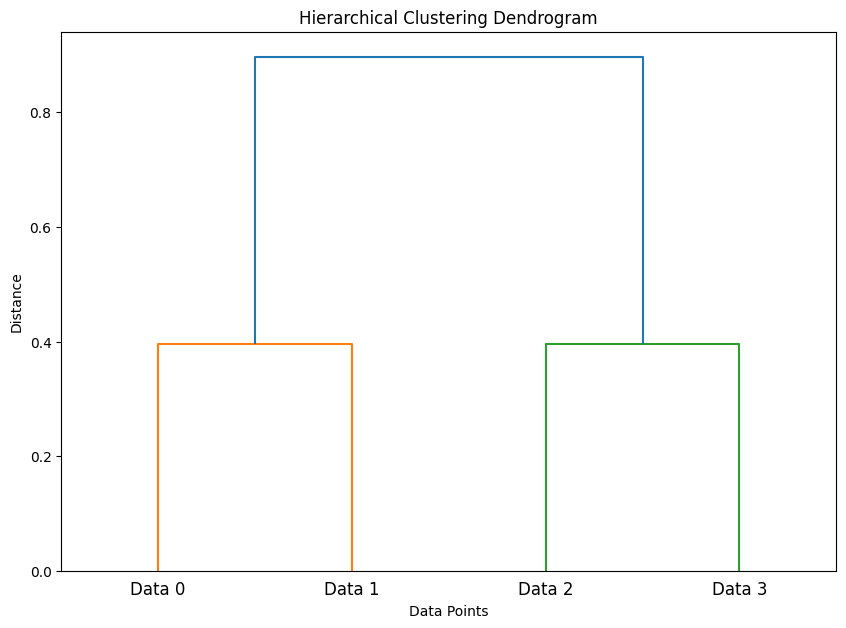

Clusters: [1 1 2 2]


In [3]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer

def custom_distance_matrix(data, labels=None):
    """
    创建自定义的距离矩阵，结合余弦相似度和杰卡德距离。
    
    :param data: 数据点的特征矩阵 (n_samples, n_features)
    :param labels: 如果数据是标签形式（集合），传入一个列表。
    :return: 自定义距离矩阵
    """
    if labels is not None:
        mlb = MultiLabelBinarizer()
        data = mlb.fit_transform(labels)

    # 余弦相似性转化为距离
    cosine_sim = cosine_similarity(data)
    cosine_dist = 1 - cosine_sim

    # 计算杰卡德距离
    def jaccard_distance(set_a, set_b):
        intersection = np.logical_and(set_a, set_b).sum()
        union = np.logical_or(set_a, set_b).sum()
        return 1 - intersection / union if union != 0 else 1

    jaccard_dist = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            jaccard_dist[i, j] = jaccard_distance(data[i], data[j])

    # 组合距离矩阵
    combined_dist = 0.5 * cosine_dist + 0.5 * jaccard_dist

    # 确保对角线为0
    np.fill_diagonal(combined_dist, 0)
    return combined_dist

def hierarchical_clustering(data, labels=None, method='average', threshold=0.7):
    """
    执行层次聚类，使用自定义距离矩阵。
    
    :param data: 数据点的特征矩阵 (n_samples, n_features)
    :param labels: 如果数据是标签形式（集合），传入一个列表。
    :param method: 层次聚类的方法，例如 'average', 'single', 'complete'
    :param threshold: 距离阈值，确定聚类数量
    :return: 聚类结果
    """
    dist_matrix = custom_distance_matrix(data, labels)
    # 压缩成下三角形式的距离矩阵
    condensed_dist_matrix = squareform(dist_matrix, checks=False)
    linkage_matrix = linkage(condensed_dist_matrix, method=method)
    clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')
    return clusters, linkage_matrix

# 示例数据
data = np.array([[1, 0, 1, 0], [1, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1]])
labels = [['apple', 'banana'], ['apple'], ['banana', 'orange'], ['orange']]

# 聚类
clusters, linkage_matrix = hierarchical_clustering(data, labels)

# 可视化树状图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=[f"Data {i}" for i in range(len(data))])
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

print("Clusters:", clusters)


